In [3]:
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [6]:
!pip install matplotlib
!pip install seaborn

Contesta a las siguientes preguntas utilizando la visualización más apropiada.

¿Cómo se distribuyen los precios de los productos?

¿Cuál es la relación entre el precio y la calificación promedio de los productos?

¿Cómo se distribuyen los precios de los productos en función de si se utilizan anuncios promocionales (uses_ad_boosts) o no?

¿Existe una relación entre el uso de anuncios y las unidades vendidas?

¿Cuál es la relación entre el precio de envío y las unidades vendidas?

¿Cuál es la distribución de las calificaciones de los empleados (rating_employee) para los productos que tienen el distintivo "Buena calidad del producto" (badge_product_quality) y para los que no lo tienen? Haced que las dos gráficas tengan la misma escala en los dos ejes.

Compara diferentes distribuciones de precios de productos en función de si tienen el distintivo "Producto local" o "Buena calidad del producto". Tendréis que crear dos gráficas en un subplot, en la primera poner los precios de los productos locales ("badge_local_product")

¿Cómo se distribuyen los precios de los productos?

In [4]:
df = pd.read_csv("merchant_fill_nonulls.csv")

In [24]:
df.head(5)

,Unnamed: 0,title,price,retail_price,units_sold,uses_ad_boosts,rating_sold,rating_count,badge_local_product,badge_product_quality,...,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation,rating_four_count,rating_three_count,rating_two_count,rating_one_count,rating_five_count
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,No,3.76,54,No,Buena,...,16.00,14.00,54.0,14.29,Buena,8.0,10.0,1.0,9.0,26.0
1,1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.00,22,20000,Si,3.45,6135,No,Buena,...,5.68,10.33,1057.0,-63.64,Regular,1027.0,1118.0,644.0,1077.0,2269.0
2,2,Nouvelle mode d'été femmes robe décontractée c...,4.90,8,1000,Si,3.83,99,No,Buena,...,5.68,10.33,1057.0,-38.75,Regular,18.0,23.0,8.0,7.0,43.0
3,3,Summer Women s Fashion Lace Up Tie Pants Plus...,4.93,6,100,No,3.77,47,No,Buena,...,5.68,10.33,1057.0,-17.83,Regular,7.0,8.0,5.0,5.0,22.0
4,4,Nouvelle mode d'été femmes robe décontractée c...,5.65,10,100,Si,2.86,7,No,Buena,...,5.68,10.33,1057.0,-43.50,Regular,1.0,2.0,2.0,1.0,1.0


In [6]:
df.shape

(1573, 41)

In [7]:
df.value_counts("price")

price
8.00     282
11.00    202
7.00     129
9.00     126
6.00     120
        ... 
5.70       1
5.72       1
2.70       1
5.82       1
49.00      1
Name: count, Length: 127, dtype: int64

In [8]:
print("Valores nulos en la columna 'price' (booleano):")
df["price"].isnull().sum()


Valores nulos en la columna 'price' (booleano):


0

In [10]:
df["price"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1573 entries, 0 to 1572
Series name: price
Non-Null Count  Dtype  
--------------  -----  
1573 non-null   float64
dtypes: float64(1)
memory usage: 12.4 KB


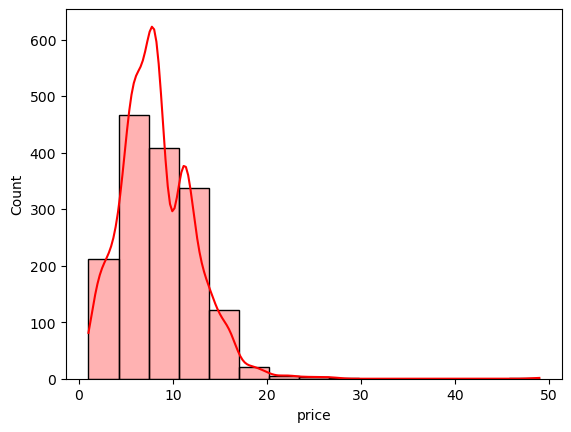

In [19]:
sns.histplot(data=df, x = 'price', bins = 15, kde=True, color='red', stat='count', alpha = 0.3);

In [12]:
#plt.hist(df["price"], bins=15, color="blue", alpha=0.5);  no funciona matplotlib!!!!!!!!1

AttributeError: module 'matplotlib' has no attribute 'hist'

In [ ]:
¿Cuál es la relación entre el precio y la calificación promedio de los productos?

In [13]:
df.columns

Index(['Unnamed: 0', 'title', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating_sold', 'rating_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'origin_country', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_id',
       'product_url', 'product_id', 'listed_products', 'total_units_sold',
       'mean_units_sold_per_product', 'rating_employee',
       'merchant_ratings_count', 'mean_product_prices', 'mean_retail_prices',
       'mean_product_ratings_count', 'discount_percentage',
       'seller_reputation', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'rating_five_count'],
      dtype='object')

rating_sold y price

In [20]:
df["rating_sold"].min()

1.0

In [21]:
df["rating_sold"].max()

5.0

In [23]:
df["price"].max()

49.0

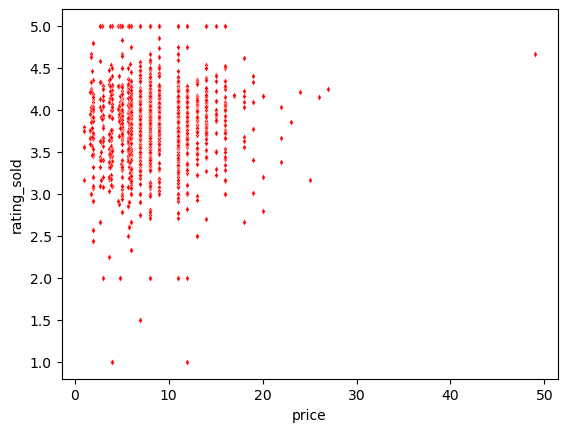

In [22]:
sns.scatterplot(data=df, x = 'price', y = 'rating_sold', marker='d', color = 'red', s=10);


¿Cómo se distribuyen los precios de los productos en función de si se utilizan anuncios promocionales (uses_ad_boosts) o no?

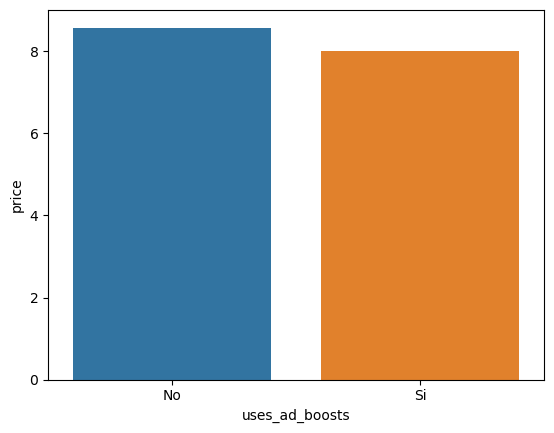

In [29]:
sns.barplot(data=df, x='uses_ad_boosts', y='price', hue='uses_ad_boosts', errorbar=None);

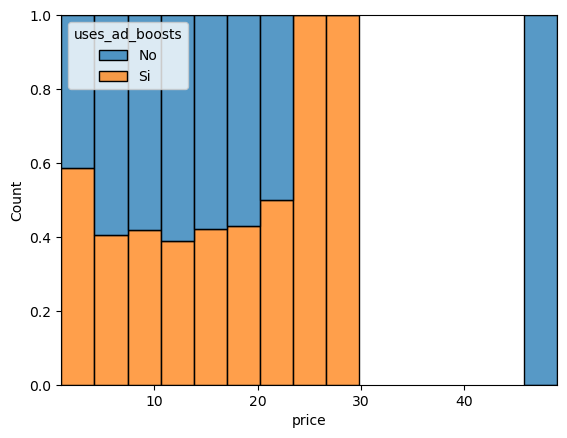

In [34]:
sns.histplot(data=df, x = 'price', hue='uses_ad_boosts', bins = 15, multiple="fill");

¿Existe una relación entre el uso de anuncios y las unidades vendidas?

uses_ad_boosts, units_sold

In [36]:
bins = np.arange(10000,1000000,10000)

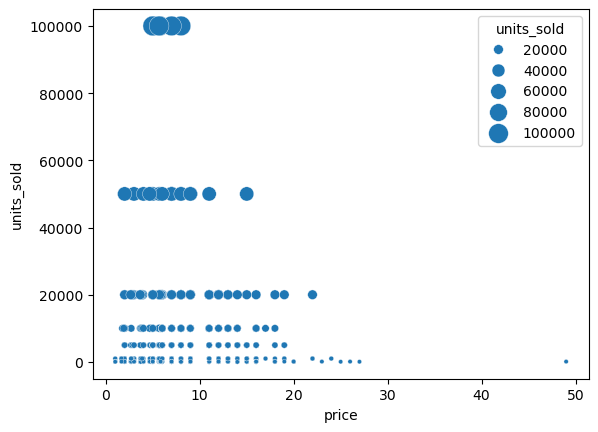

In [39]:
sns.scatterplot(data=df, x = 'price', y = "units_sold", size = "units_sold", sizes=(10,200));